In [ ]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')# To ignore unnecessary warnings

from sklearn.datasets import load_iris
import pandas as pd

In [2]:
# Load the Iris dataset and create a DataFrame
iris= load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = load_iris().target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Display the feature names, target names, and shape of the DataFrame
print('Feature names:', iris.feature_names)
print('Target names:', iris.target_names)
print('Data shape:', df.shape)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 5)


In [4]:
# Display the columns
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

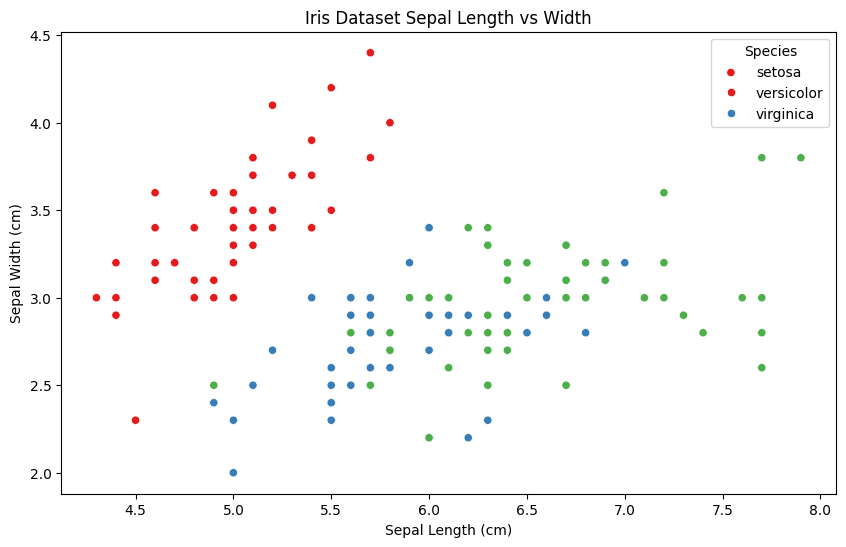

In [5]:
# Plotting the data with scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target' , palette='Set1')
plt.title('Iris Dataset Sepal Length vs Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species', labels= iris.target_names)
plt.show()

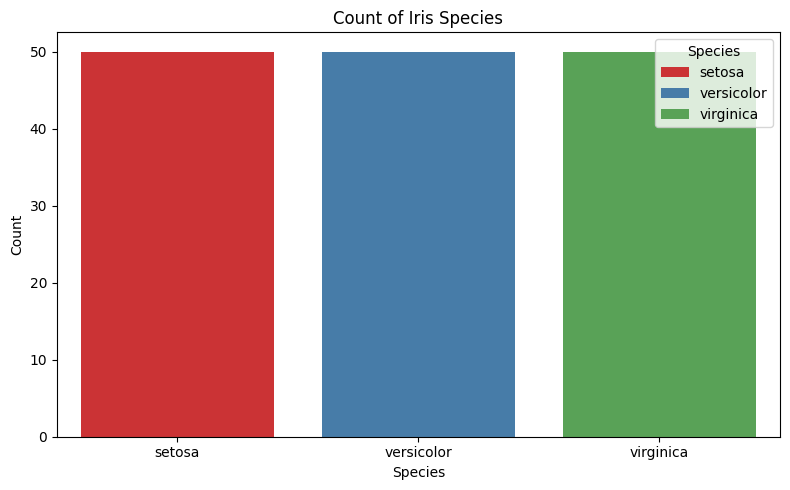

In [6]:
# Ploting a count plot for the target variable
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='target', palette='Set1', hue='target')
plt.title('Count of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.legend(title='Species', labels=iris.target_names)
plt.tight_layout()
plt.show()

In [7]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(iris.data,iris.target, test_size=0.2, random_state=42)

In [8]:
# Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Save the scaler for future use
import pickle as pkl
with open('scaler.pkl','wb') as f:
    pkl.dump(scaler, f)

In [9]:
# Train a K-Nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
# Train a Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
# Evaluate the models using accuracy, confusion matrix, and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict using the trained models
y_pred_knn = knn.predict(X_test)
y_pred_lr = lr.predict(X_test)

print (f'KNN Accuracy:{accuracy_score(y_test,y_pred_knn)}\n'
       f'KNN Confusion Matrix:\n{confusion_matrix(y_test,y_pred_knn)}\n'
       f'KNN Classification Report:\n{classification_report(y_test,y_pred_knn)}\n'
       
       f'Logistic Regression Accuracy:{accuracy_score(y_test,y_pred_lr)}\n'
       f'Logistic Regression Confusion Matrix:\n{confusion_matrix(y_test,y_pred_lr)}\n'
       f'Logistic Regression Classification Report:\n{classification_report(y_test,y_pred_lr)}'
       )
         

KNN Accuracy:0.9666666666666667
KNN Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Logistic Regression Accuracy:0.9666666666666667
Logistic Regression Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted 

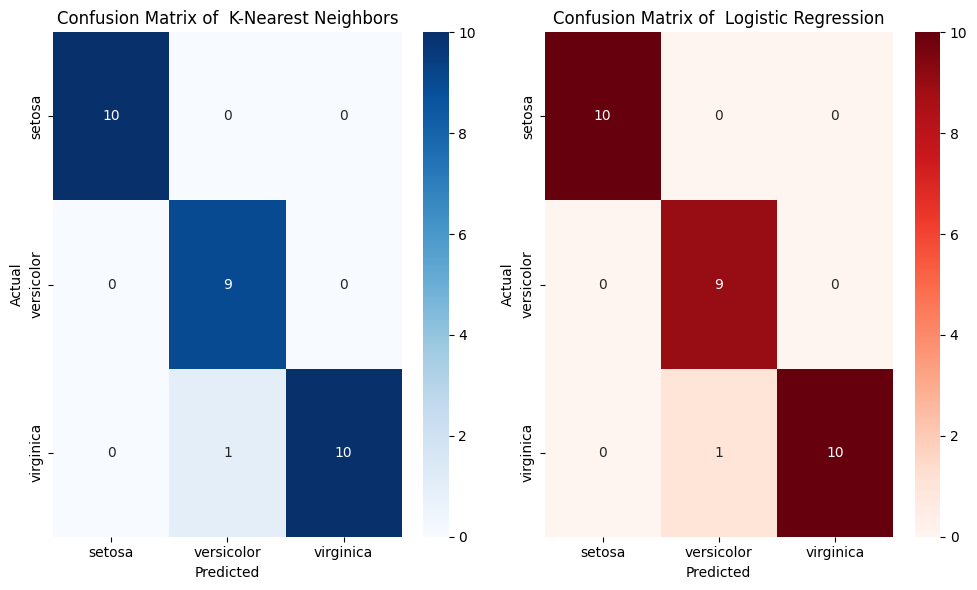

In [12]:
# Plotting the Confusion matrix
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test,y_pred_knn), annot=True, cmap='Blues', xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.title('Confusion Matrix of  K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,y_pred_lr), annot=True, cmap='Reds',xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.title('Confusion Matrix of  Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [13]:
# Train a Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
# Train a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
# Predict using the trained models
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [16]:
# Evaluate the Decision Tree and Random Forest models
print('DECISION TREE \n',
      f'Accuracy of Decision Tree: {accuracy_score(y_test, y_pred_dt)}\n'
      f'Confusion Matrix of Decision Tree:\n{confusion_matrix(y_test, y_pred_dt)}\n'
      f'Classification Report of Decision Tree:\n{classification_report(y_test, y_pred_dt)}\n'
      '\n'
      'RANDOM FOREST \n',
      f'Accuracy of Random Forest: {accuracy_score(y_test, y_pred_rf)}\n'
      f'Confusion Matrix of Random Forest:\n{confusion_matrix(y_test, y_pred_rf)}\n'
      f'Classification Report of Random Forest:\n{classification_report(y_test, y_pred_rf)}'
      )

DECISION TREE 
 Accuracy of Decision Tree: 1.0
Confusion Matrix of Decision Tree:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report of Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


RANDOM FOREST 
 Accuracy of Random Forest: 0.9666666666666667
Confusion Matrix of Random Forest:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg 

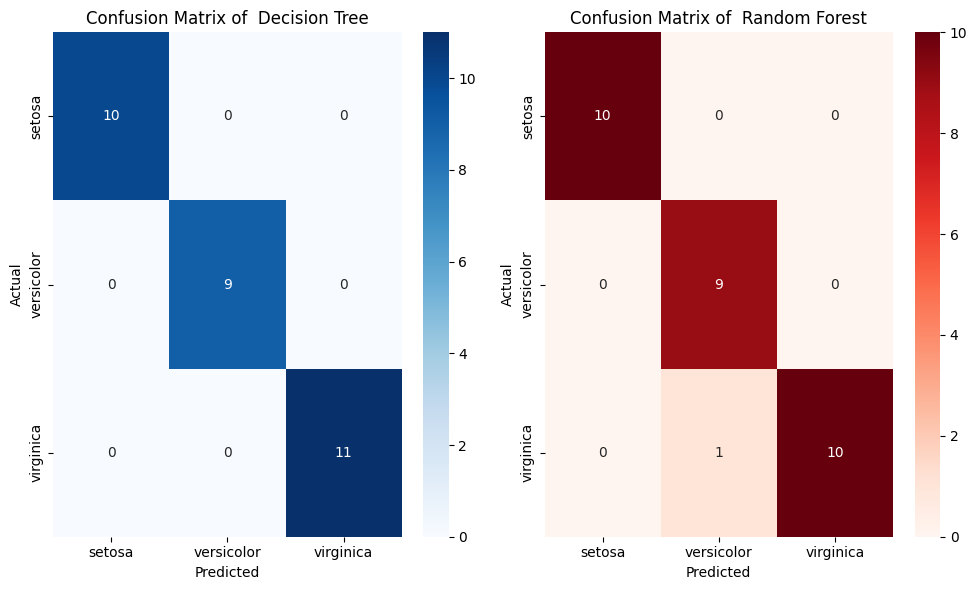

In [17]:
# Plotting the Confusion matrix
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test,y_pred_dt), annot=True, cmap='Blues', xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.title('Confusion Matrix of  Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True, cmap='Reds',xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.title('Confusion Matrix of  Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [18]:
# Compile the results into a DataFrame for better visualization
results = {
    'KNN': {
        'Accuracy': accuracy_score(y_test, y_pred_knn),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_knn),
        'Classification Report': classification_report(y_test, y_pred_knn)},
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, y_pred_lr),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_lr),
        'Classification Report': classification_report(y_test, y_pred_lr)},
    'Decision Tree': {
        'Accuracy': accuracy_score(y_test, y_pred_dt),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_dt),
        'Classification Report': classification_report(y_test, y_pred_dt)},
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_rf),
        'Classification Report': classification_report(y_test, y_pred_rf)} 
}
results=pd.DataFrame(results)

In [19]:
# Printing the result
results

,KNN,Logistic Regression,Decision Tree,Random Forest
Accuracy,0.966667,0.966667,1.0,0.966667
Confusion Matrix,"[[10, 0, 0], [0, 9, 0], [0, 1, 10]]","[[10, 0, 0], [0, 9, 0], [0, 1, 10]]","[[10, 0, 0], [0, 9, 0], [0, 0, 11]]","[[10, 0, 0], [0, 9, 0], [0, 1, 10]]"
Classification Report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...


All four models performed exceptionally well, with accuracies above 96%. The Decision Tree achieved 100% accuracy, correctly classifying all test samples. However, this may indicate overfitting. KNN, Logistic Regression, and Random Forest each misclassified one sample, showing strong but slightly less perfect performance. Overall, all models are effective, but Random Forest offers better generalization in most real world scenarios.

In [20]:
# Print the parameters of the trained models
print(f'KNN: {knn.get_params()}\n',
      f'Logistic Regression: {lr.get_params()}\n',
      f'Decision Tree: {dt.get_params()}\n',
      f'Random Forest: {rf.get_params()}'
)

KNN: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
 Logistic Regression: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
 Decision Tree: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
 Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples

In [21]:
# using grid search to find the best hyperparameters for all models
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for each model
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

param_grid_lr = {
    'class_weight': [None, 'balanced'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'] 
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}   
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}   
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)


,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [22]:
# Print the best parameters and scores for each model
print('KNN\n',
    f'Best parameters for KNN: {grid_knn.best_params_}\n',
      f'Best Accuracy for KNN: {grid_knn.best_score_}\n',
      '\n',
      'Logistic Regression\n',
      f'Best parameters for Logistic Regression: {grid_lr.best_params_}\n',
      f'Best Accuracy for Logistic Regression: {grid_lr.best_score_}\n',
      '\n',
      'Decision Tree\n',
      f'Best parameters for Decision Tree: {grid_dt.best_params_}\n',
      f'Best Accuracy for Decision Tree: {grid_dt.best_score_}\n',
      '\n',
      'Random Forest\n',
      f'Best parameters for Random Forest: {grid_rf.best_params_}\n',
      f'Best Accuracy for Random Forest: {grid_rf.best_score_}'
      )

KNN
 Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
 Best Accuracy for KNN: 0.9583333333333334
 
 Logistic Regression
 Best parameters for Logistic Regression: {'C': 1, 'class_weight': None, 'solver': 'lbfgs'}
 Best Accuracy for Logistic Regression: 0.9583333333333334
 
 Decision Tree
 Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
 Best Accuracy for Decision Tree: 0.95
 
 Random Forest
 Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
 Best Accuracy for Random Forest: 0.9583333333333334


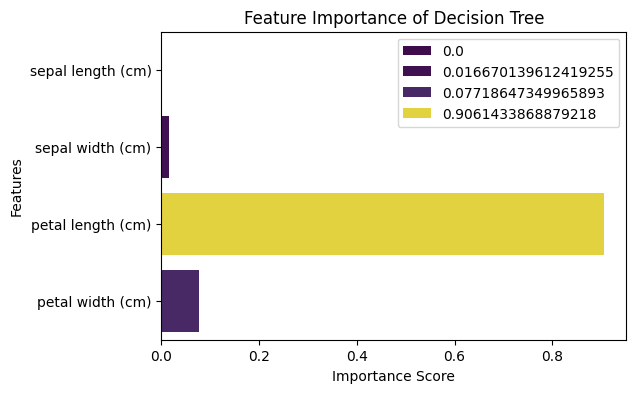

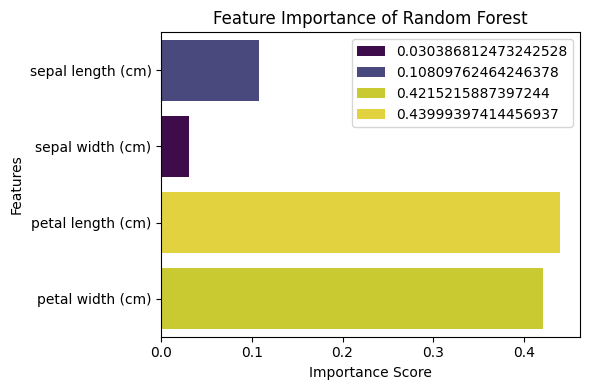

In [23]:
# Feature importance for the the tree based model
feature_importance_dt= dt.feature_importances_
feature_importance_rf= rf.feature_importances_

plt.figure(figsize=(6,4))
sns.barplot(x=feature_importance_dt,y=iris.feature_names,hue=feature_importance_dt,palette='viridis')
plt.title('Feature Importance of Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Features')

plt.figure(figsize=(6,4))
sns.barplot(x=feature_importance_rf,y=iris.feature_names, hue=feature_importance_rf, palette='viridis')
plt.title('Feature Importance of Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

For Decision Tree, the petal length (cm) is by far the most important feature, contributing over 90% to the model's decision-making. Other features, especially sepal length, have minimal impact.

For Random Forest, the petal length and petal width are the most influential features, contributing over 85% combined to the model’s predictions. Sepal features have minimal impact by comparison.



In [24]:
# saving the models to pc
import pickle

with open('KNN_model.pkl', 'wb') as f:
    pickle.dump(knn, f)
    
with open('Logistic_Regression_model.pkl', 'wb') as f:
    pickle.dump(lr, f)
    
with open('Decision_Tree_model.pkl', 'wb') as f:
    pickle.dump(dt, f)
    
with open('Random_Forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)
    

In [25]:
# Function to predict the class of a new sample using the trained KNN model
import pickle
import numpy as np
def knn_model(SepalLength, SepalWidth, PetalLength, PetalWidth):
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    with open('KNN_model.pkl', 'rb') as f:
        knn = pickle.load(f)
    
    data = [[SepalLength, SepalWidth, PetalLength, PetalWidth]]
    data = scaler.transform(data)
    data = np.array(data)
    data = data.reshape(1, -1)
    
    prediction = knn.predict(data)
    if prediction == 0:
        return 'Setosa'
    elif prediction == 1:
        return 'Versicolor'
    elif prediction == 2:
        return 'Virginica'
    else:
        return 'Unknown class'
    

    
    

In [26]:
# Function to predict the class of a new sample using the trained Logistic Regression model
def lr_model(SepalLength, SepalWidth, PetalLength, PetalWidth):
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    with open('Logistic_Regression_model.pkl', 'rb') as f:
        lr = pickle.load(f)
    
    data = [[SepalLength, SepalWidth, PetalLength, PetalWidth]]
    data = scaler.transform(data)
    data = np.array(data)
    data = data.reshape(1, -1)
    
    prediction = lr.predict(data)
    if prediction == 0:
        return 'Setosa'
    elif prediction == 1:
        return 'Versicolor'
    elif prediction == 2:
        return 'Virginica'
    else:
        return 'Unknown class'

In [27]:
# Function to predict the class of a new sample using the trained Decision Tree model
def dt_model(SepalLength, SepalWidth, PetalLength, PetalWidth):
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    with open('Decision_Tree_model.pkl', 'rb') as f:
        dt = pickle.load(f)
    
    data = [[SepalLength, SepalWidth, PetalLength, PetalWidth]]
    data = scaler.transform(data)
    data = np.array(data)
    data = data.reshape(1, -1)
    
    prediction = dt.predict(data)
    if prediction == 0:
        return 'Setosa'
    elif prediction == 1:
        return 'Versicolor'
    elif prediction == 2:
        return 'Virginica'
    else:
        return 'Unknown class'  

In [28]:
# Function to predict the class of a new sample using the trained Random Forest model
def rf_model(SepalLength, SepalWidth, PetalLength, PetalWidth):
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    with open('Random_Forest_model.pkl', 'rb') as f:
        rf = pickle.load(f)
    
    data = [[SepalLength, SepalWidth, PetalLength, PetalWidth]]
    data = scaler.transform(data)
    data = np.array(data)
    data = data.reshape(1, -1)
    
    prediction = rf.predict(data)
    if prediction == 0:
        return 'Setosa'
    elif prediction == 1:
        return 'Versicolor'
    elif prediction == 2:
        return 'Virginica'
    else:
        return 'Unknown class'